In [9]:
%run "../../../PyUtils/common.ipynb"
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcess
from sklearn import linear_model
from sklearn import cross_validation
from sklearn import ensemble
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from statsmodels.regression.quantile_regression import QuantReg
import statsmodels.formula.api as smf
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

#Balances the classes in the dataframe at the desired index by duplicating entries for that index at random
#
#@param dataFrame - The dataFrame to add duplicates to
#@param index - The index that contains the class
def BalanceClassesWithDuplicates(dataFrame, index):
    newDF = dataFrame
    classes = dataFrame[index].unique()
    print("classes: [" + ''.join(str(e)+',' for e in classes)+']')
    numberOfClasses = len(dataFrame[index].unique())
    print("Number of Classes:" + str(numberOfClasses))
    
    sizeOfClasses=[]
    
    for aClass in classes:
        sizeOfClasses.append(len(dataFrame.values[dataFrame[index].values == aClass]))
    
    print("Size of Classes: [" + ''.join(str(e)+', ' for e in sizeOfClasses)+']')
    sizeOfLargestClass = max(sizeOfClasses)
    print("Size of Largest Class: " + str(sizeOfLargestClass))
    amountToAddToEachClass = []
    
    for classSize in sizeOfClasses:
        amountToAddToEachClass.append(sizeOfLargestClass - classSize)
        
    print("Amount to Add to Each Class: [" + ''.join(str(e)+', ' for e in amountToAddToEachClass)+']')
    
    k=0
    for amount in amountToAddToEachClass:
        for i in range(0,amount):
           newDF = newDF.append(dataFrame[dataFrame[index].values == classes[k]].sample(n=1, replace=True))
        
        k += 1
    
    
    return newDF;
    
#Balances the classes in the dataframe at the desired index by removing entries at random from the extra 
#represented classes
#
#@param dataFrame - The dataFrame to add duplicates to
#@param index - The index that contains the class
#def BalanceClassesRemoveExtras(dataFrame, index):


patient = "kuky"
ampm = "am"
file = "http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20calculated_jlee%20WHERE%20ampm=%27"+ampm+"%27%20AND%20pname=%27"+patient+"%27%20ORDER%20BY%20date,%20time"

predictQuantile=False
lowerPercent = 0.20
upperPercent = 0.80

fileName = file;

dfOriginal = LoadDataSet(fileName, checkForDateTime=False);
#displayDFs (dfOriginal, maxrows=3 )
#for c in dfOriginal.columns: print (c,  end=', ')
dfOriginal

<IPython.core.display.Javascript object>

,pname,date,ampm,time,pef,pef_zone,tm_window,so2_max,co_max,o3_max,no2_max,pm10_max,so2_sum,co_sum,o3_sum,no2_sum,pm10_sum,so2_avg,co_avg,o3_avg,no2_avg,pm10_avg,temperaturec,windspeedms,winddirection,precipitationpercent,vaporpressurehpa,dewpointtemperaturec,airpressurehpa,sealevelpressurehpa,groundtemperaturec,temperature_max,airpressure_max,precipitation_max,temperature_min,airpressure_min,precipitation_min,temperature_diff,airpressure_diff,precipitation_diff
0,kuky,2014-11-22,am,10:10:00,453,Y,27.000,0.007,0.500,0.037,0.032,137.000,0.118,9.983,0.523,0.619,2135.667,0.004,0.370,0.019,0.023,79.099,9.500,0.800,160.000,99.000,11.700,9.300,1020.900,1025.100,9.000,15.500,1020.900,99.000,2.900,1017.100,46.000,12.600,3.800,53.000
1,kuky,2014-11-23,am,08:42:00,430,Y,22.533,0.003,0.600,0.019,0.032,95.000,0.068,10.283,0.126,0.517,1474.400,0.003,0.456,0.006,0.023,65.432,6.500,1.700,70.000,100.000,9.600,6.400,1023.600,1027.800,7.000,10.700,1023.600,100.000,4.800,1018.900,91.000,5.900,4.700,9.000
2,kuky,2014-11-24,am,09:01:00,464,Y,24.317,0.004,0.700,0.021,0.030,132.000,0.079,13.062,0.180,0.534,2414.300,0.003,0.537,0.007,0.022,99.286,9.400,0.300,0.000,74.000,8.700,4.900,1018.900,1023.100,8.300,11.700,1023.800,100.000,6.500,1018.300,67.000,5.200,5.500,33.000
3,kuky,2014-11-25,am,08:35:00,418,Y,23.567,0.005,0.900,0.006,0.035,155.000,0.089,13.813,0.090,0.634,2408.300,0.004,0.586,0.004,0.027,102.191,4.800,1.000,270.000,96.000,8.200,4.200,1014.400,1018.600,3.400,12.300,1018.900,96.000,4.000,1013.300,42.000,8.300,5.600,54.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,kuky,2016-01-30,am,07:48:00,529,G,24.233,0.006,0.900,0.019,0.058,74.000,0.082,14.650,0.115,1.071,1170.333,0.003,0.605,0.005,0.044,48.294,-4.000,0.000,0.000,96.000,4.400,-4.500,1021.400,1025.800,-4.400,6.400,1022.200,96.000,-4.000,1019.400,32.000,10.400,2.800,64.000
435,kuky,2016-01-31,am,08:26:00,510,G,24.633,0.013,1.000,0.033,0.063,85.000,0.087,11.313,0.500,0.583,1098.933,0.004,0.459,0.020,0.024,44.612,-4.700,1.600,320.000,60.000,2.600,-11.200,1024.600,1029.000,-4.900,6.700,1025.100,98.000,-4.700,1021.000,49.000,11.400,4.100,49.000
436,kuky,2016-02-01,am,07:20:00,480,G,22.900,0.024,0.500,0.041,0.040,43.000,0.126,7.193,0.618,0.335,775.933,0.006,0.314,0.027,0.015,33.884,-7.900,1.400,290.000,48.000,1.600,-17.000,1026.400,1030.900,-7.600,0.400,1026.500,60.000,-7.900,1024.400,31.000,8.300,2.100,29.000
437,kuky,2016-02-02,am,07:20:00,498,G,24.000,0.008,0.700,0.040,0.046,78.000,0.094,9.567,0.404,0.616,948.667,0.004,0.399,0.017,0.026,39.528,-9.900,0.600,180.000,64.000,1.800,-15.400,1025.100,1029.600,-9.000,-1.000,1027.000,64.000,-9.900,1024.200,25.000,8.900,2.800,39.000


In [10]:
#Testing Funcions
classIndex='Class'
d = {'Xvariables': [11, 2, 23, 24, 5, 16, 17, 18], classIndex: [1, 0, 2, 2, 0, 1, 1, 1]}
testDF = pd.DataFrame(data=d)
print(testDF)
testDF = BalanceClassesWithDuplicates(testDF, classIndex)
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(testDF)

   Class  Xvariables
0      1          11
1      0           2
2      2          23
3      2          24
4      0           5
5      1          16
6      1          17
7      1          18
classes: [1,0,2,]
Number of Classes:3
Size of Classes: [4, 2, 2, ]
Size of Largest Class: 4
Amount to Add to Each Class: [0, 2, 2, ]
   Class  Xvariables
0      1          11
1      0           2
2      2          23
3      2          24
4      0           5
5      1          16
6      1          17
7      1          18
4      0           5
4      0           5
3      2          24
3      2          24


In [11]:
#Break into groups by percentage

dfOriginal.sort_values(by='pef', ascending=True, inplace=True)
dfOriginal.reset_index(drop=True, inplace=True)
numberOfElements = len(dfOriginal)
upperBoundary = upperPercent*numberOfElements
lowerBoundary = lowerPercent*numberOfElements
dfOriginal['percent_group']=-1

for i in dfOriginal.index:

    if i < lowerBoundary:
        dfOriginal['percent_group'][i] = 0

    elif i > upperBoundary : 
        dfOriginal['percent_group'][i] = 2

    else:
        dfOriginal['percent_group'][i] = 1

print(dfOriginal)

    pname        date ampm      time  pef pef_zone  tm_window  so2_max  co_max  o3_max  no2_max  pm10_max  so2_sum  co_sum  o3_sum  no2_sum  pm10_sum  so2_avg  co_avg  o3_avg  no2_avg  pm10_avg  temperaturec  windspeedms  winddirection  precipitationpercent  vaporpressurehpa  dewpointtemperaturec  airpressurehpa  sealevelpressurehpa  groundtemperaturec  temperature_max  airpressure_max  precipitation_max  temperature_min  airpressure_min  precipitation_min  temperature_diff  airpressure_diff  precipitation_diff  percent_group
0    kuky  2014-11-25   am  08:35:00  418        Y     23.567    0.005   0.900   0.006    0.035   155.000    0.089  13.813   0.090    0.634  2408.300    0.004   0.586   0.004    0.027   102.191         4.800        1.000        270.000                96.000             8.200                 4.200        1014.400             1018.600               3.400           12.300         1018.900             96.000            4.000         1013.300             42.000        

In [12]:
df=dfOriginal.copy()

#1. Remove all the rows that does not have any pef values 

df=df.reset_index(drop=True)

#2. Combine 
df=df.fillna(0)
sdttm = df.date + " " + df.time
df.insert(0, 'sdttm', sdttm)
df.sdttm = pd.to_datetime(df.sdttm)

df.sort_values(by='sdttm', ascending=True, inplace=True)
alldrps = "cname, pname, date, time, ampm, timeofday, dateofmeasure, npt, pef1, pef2, pef3, temperature_diff, airpressure_diff, precipitation_diff, tm_window"
if predictQuantile:
    alldrps += ', pef_zone'
else:
    alldrps += ', percent_group'
drps  = alldrps.split(', ')
df=df.drop(drps, axis=1, errors='ignore')
df=df.reset_index(drop=True)

## <== do the following for SAP PA tool
#pef = df.pef;
#df=df.drop(['pef'], axis=1)
#df.insert(1, 'pef1', pef)

#pef[-10:]=0     # Set last 10 to zero for predictions
#df.insert(1, 'pef', pef)
#df.to_csv("HanD/hand1.csv", sep=';')

df1 = df.copy()
df1 = df1.set_index(df1.sdttm)
df1=df1.drop('sdttm', axis=1, errors='ignore')

nq = 5
lnq=list(range(0,nq))
s= pd.qcut(df1.pef, nq, labels=lnq )
df1.insert(1,"pefcat", s)
df1.pefcat = df1.pefcat.astype(str)

pefcol = df1['pef']



columns =  '''so2_max,co_max,o3_max,no2_max,pm10_max,so2_sum,co_sum,o3_sum,no2_sum,pm10_sum,so2_avg,co_avg,o3_avg,no2_avg,pm10_avg,temperaturec,windspeedms,winddirection,precipitationpercent,vaporpressurehpa,dewpointtemperaturec,airpressurehpa,sealevelpressurehpa,groundtemperaturec,
 temperature_max,airpressure_max,precipitation_max,temperature_min,airpressure_min,precipitation_min'''
if predictQuantile:
    columns += ',percent_group'
else:
    columns += ',pef_zone'

#'''pefcat,pef_zone,so2_max,co_max,o3_max,no2_max,temperaturec,windspeedms,precipitationpercent,vaporpressurehpa,
#dewpointtemperaturec,airpressurehpa,sealevelpressurehpa,groundtemperaturec,temperature_max,airpressure_max,temperature_min'''

 
#amin,pmin,tmaxlesstmin,amaxlessamin,pmaxlesspmin'''
cs = [c.strip() for c in columns.split(',')]

df1=df1[cs]
#HTML(df1.to_html())
#displayDFs (df1, maxrows=3 )
df1

,so2_max,co_max,o3_max,no2_max,pm10_max,so2_sum,co_sum,o3_sum,no2_sum,pm10_sum,so2_avg,co_avg,o3_avg,no2_avg,pm10_avg,temperaturec,windspeedms,winddirection,precipitationpercent,vaporpressurehpa,dewpointtemperaturec,airpressurehpa,sealevelpressurehpa,groundtemperaturec,temperature_max,airpressure_max,precipitation_max,temperature_min,airpressure_min,precipitation_min,pef_zone
sdttm,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-11-22 10:10:00,0.007,0.500,0.037,0.032,137.000,0.118,9.983,0.523,0.619,2135.667,0.004,0.370,0.019,0.023,79.099,9.500,0.800,160.000,99.000,11.700,9.300,1020.900,1025.100,9.000,15.500,1020.900,99.000,2.900,1017.100,46.000,Y
2014-11-23 08:42:00,0.003,0.600,0.019,0.032,95.000,0.068,10.283,0.126,0.517,1474.400,0.003,0.456,0.006,0.023,65.432,6.500,1.700,70.000,100.000,9.600,6.400,1023.600,1027.800,7.000,10.700,1023.600,100.000,4.800,1018.900,91.000,Y
2014-11-24 09:01:00,0.004,0.700,0.021,0.030,132.000,0.079,13.062,0.180,0.534,2414.300,0.003,0.537,0.007,0.022,99.286,9.400,0.300,0.000,74.000,8.700,4.900,1018.900,1023.100,8.300,11.700,1023.800,100.000,6.500,1018.300,67.000,Y
2014-11-25 08:35:00,0.005,0.900,0.006,0.035,155.000,0.089,13.813,0.090,0.634,2408.300,0.004,0.586,0.004,0.027,102.191,4.800,1.000,270.000,96.000,8.200,4.200,1014.400,1018.600,3.400,12.300,1018.900,96.000,4.000,1013.300,42.000,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-30 07:48:00,0.006,0.900,0.019,0.058,74.000,0.082,14.650,0.115,1.071,1170.333,0.003,0.605,0.005,0.044,48.294,-4.000,0.000,0.000,96.000,4.400,-4.500,1021.400,1025.800,-4.400,6.400,1022.200,96.000,-4.000,1019.400,32.000,G
2016-01-31 08:26:00,0.013,1.000,0.033,0.063,85.000,0.087,11.313,0.500,0.583,1098.933,0.004,0.459,0.020,0.024,44.612,-4.700,1.600,320.000,60.000,2.600,-11.200,1024.600,1029.000,-4.900,6.700,1025.100,98.000,-4.700,1021.000,49.000,G
2016-02-01 07:20:00,0.024,0.500,0.041,0.040,43.000,0.126,7.193,0.618,0.335,775.933,0.006,0.314,0.027,0.015,33.884,-7.900,1.400,290.000,48.000,1.600,-17.000,1026.400,1030.900,-7.600,0.400,1026.500,60.000,-7.900,1024.400,31.000,G
2016-02-02 07:20:00,0.008,0.700,0.040,0.046,78.000,0.094,9.567,0.404,0.616,948.667,0.004,0.399,0.017,0.026,39.528,-9.900,0.600,180.000,64.000,1.800,-15.400,1025.100,1029.600,-9.000,-1.000,1027.000,64.000,-9.900,1024.200,25.000,G


In [13]:
# from sklearn.neural_network import MLPClassifier
# nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

# clf = nn;

# Y_SCALER = None
# #Normalize the input and save the scalar for outcome variable "pefmax" in this case.
# scaler = StandardScaler()
# dp = prepareDF(df1, True)
# for c in dp.columns:
#     if ( c == 'pefcat'):
#         #Y_SCALER = StandardScaler()
#         #dp[c] = Y_SCALER.fit_transform(dp[c])
#         pass;
#     else:
#         dp[c] = scaler.fit_transform(dp[c])
        
# #dp = dp["so2,pef,o3,co,no2,pm10,tmax".split(',')]
# dp1 = dp.set_index(pd.Series(range(0,len(dp)) ) )

# X = dp1.ix[:, dp1.columns != 'pefcat']
# y = dp1.pefcat 
# X = X.as_matrix().astype(np.float)


# kf = sklearn.model_selection.KFold(n_splits=5, shuffle=True)
# y_pred = y.copy()

# # Iterate through folds\
# i = 0;
# for train_index, test_index in kf.split(X):
#     #print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = X[train_index], X[test_index]
#     y_train = y[train_index]
#     # Initialize a classifier with key word arguments\
#     print ("*",i, end ="");
#     clf.fit(X_train,y_train)
#     y_pred[test_index] = clf.predict(X_test)
#     i = i +1;



Feature space holds 438 observations and 30 features
Unique target labels: ['Y' 'G']
* 0* 1* 2* 3* 4*
   DecisionTree Gini accuracy: 0.796804 
   DecisionTree Gini r^2 score: -0.431846
* 0* 1* 2* 3* 4*
   DecisionTree Entr accuracy: 0.815068 
   DecisionTree Entr r^2 score: -0.303140
* 0* 1* 2* 3* 4*
                 SVM accuracy: 0.828767 
                 SVM r^2 score: -0.206612
* 0* 1* 2* 3* 4*
                K-NN accuracy: 0.805936 
                K-NN r^2 score: -0.367493
* 0* 1* 2* 3* 4*
   Gradient Boosting accuracy: 0.821918 
   Gradient Boosting r^2 score: -0.254876
* 0* 1* 2* 3* 4*
    Logit Regression accuracy: 0.812785 
    Logit Regression r^2 score: -0.319229
* 0* 1* 2* 3* 4*
         Naive Bayes accuracy: 0.582192 
         Naive Bayes r^2 score: -1.944132


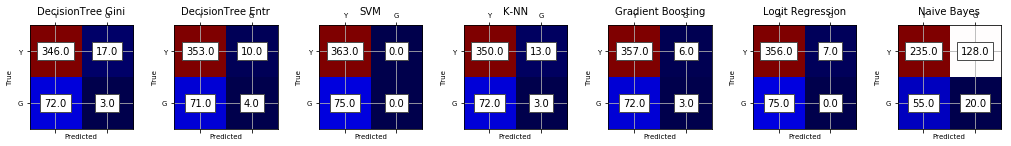

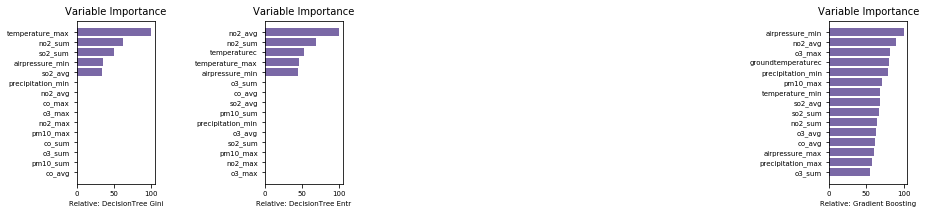

DecisionTree Gini Metrics
             precision    recall  f1-score   support

    class 0       0.00      0.00      0.00         0
    class 1       0.15      0.04      0.06        75
    class 2       0.00      0.00      0.00       363

avg / total       0.03      0.01      0.01       438

DecisionTree Entr Metrics
             precision    recall  f1-score   support

    class 0       0.00      0.00      0.00         0
    class 1       0.29      0.05      0.09        75
    class 2       0.00      0.00      0.00       363

avg / total       0.05      0.01      0.02       438

SVM Metrics
             precision    recall  f1-score   support

    class 0       0.00      0.00      0.00         0
    class 1       0.00      0.00      0.00        75
    class 2       0.00      0.00      0.00       363

avg / total       0.00      0.00      0.00       438

K-NN Metrics
             precision    recall  f1-score   support

    class 0       0.00      0.00      0.00         0
    class 1 

In [14]:
from sklearn.naive_bayes import GaussianNB

predictColumn = "pefcat"
predictColumn = "pef_zone"
if predictQuantile:
    predictColumn = "percent_group"

if ( 'pefcat' in df1.columns ):
    df1.pefcat = df1.pefcat.astype(int)
    df1=df1.drop('pefcat', axis=1)

cls = [# Comment/uncomment out any classfiers according to your need 
       # DO NOT CHANGE
        "DecisionTree Gini" , tree.DecisionTreeClassifier(max_depth=4, criterion="gini"),
        "DecisionTree Entr" , tree.DecisionTreeClassifier(max_depth=4, criterion="entropy"), 
        "SVM"               , sklearn.svm.SVC(kernel="linear"), 
#        "SVM1"              , SVC(kernel="rbf", C=10**3),
        "K-NN"              , sklearn.neighbors.KNeighborsClassifier(),
        "Gradient Boosting" , sklearn.ensemble.RandomForestClassifier(),
        "Logit Regression"  , sklearn.linear_model.LogisticRegression(),
#        "Neural NW"         , MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(25, 10), random_state=1),
        "Naive Bayes"       , GaussianNB()
];

y = df1[predictColumn]
X = df1.drop(predictColumn, axis=1)
a = Classify(X,y, True, drawConfusionMatrix=True, classifiers=cls, scale=True)
ik = 0
y_preds=[]
clsNames=[]

for i in cls:
    if type(i) is str:
        clsNames.append(i)
        y_pred = a[4][i]
        y_preds.append(y_pred)
        target_names = ['class 0', 'class 1', 'class 2']
        print(i + ' Metrics')
        y.replace(to_replace="R", value=0, inplace=True, limit=None, regex=False, method='pad', axis=None)
        y.replace(to_replace="Y", value=1, inplace=True, limit=None, regex=False, method='pad', axis=None)
        y.replace(to_replace="G", value=2, inplace=True, limit=None, regex=False, method='pad', axis=None)
        print(classification_report(y, y_pred, target_names=target_names))


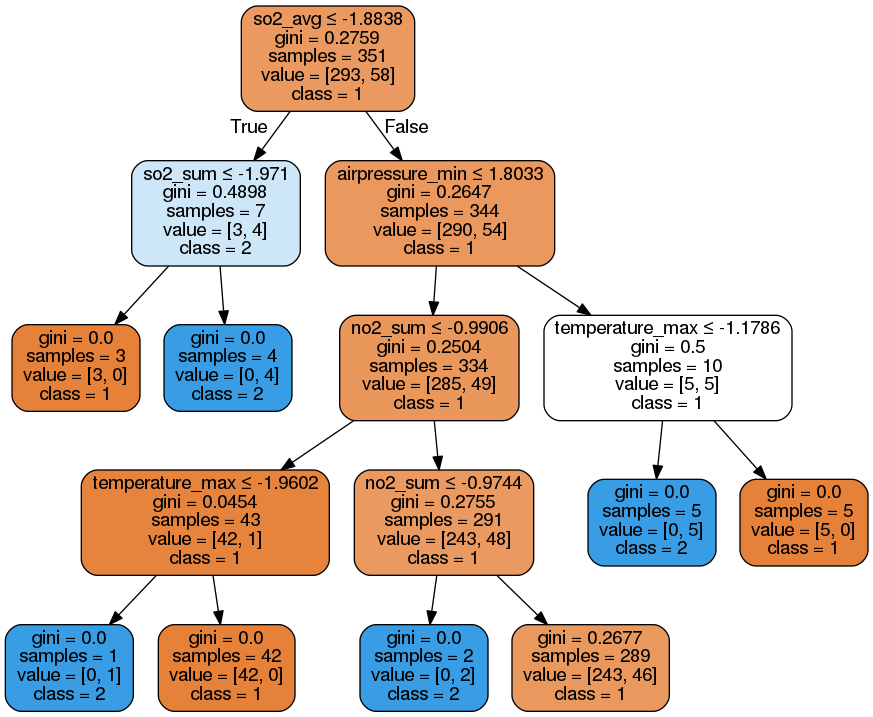

In [15]:
#(X1,y1,ra,cls) = Classify1(X,y, True, drawConfusionMatrix=True, classifiers=cls, scale=False)
DrawDecisionTree(X,y, cls[1])


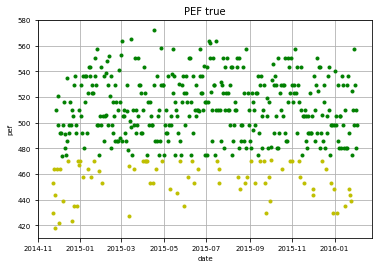

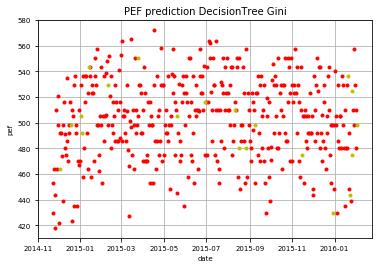

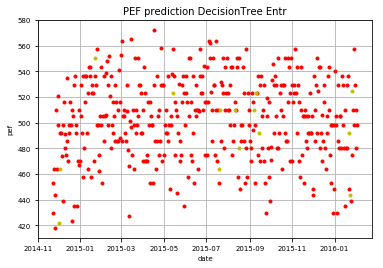

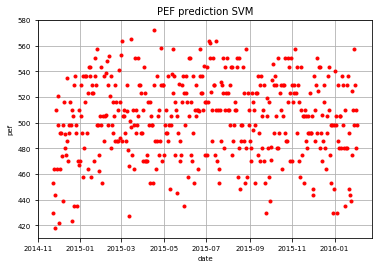

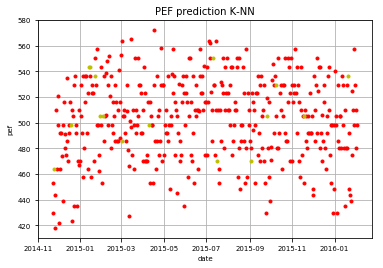

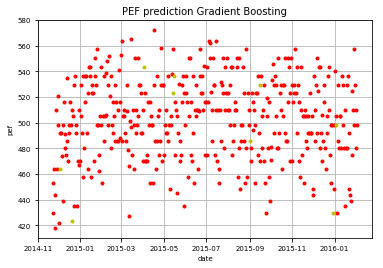

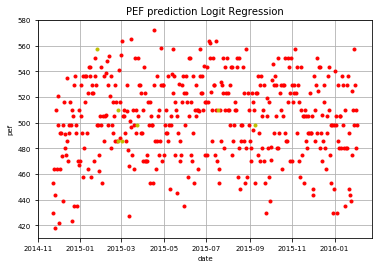

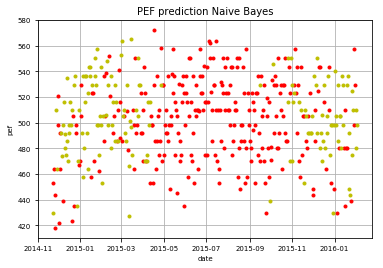

In [16]:
import matplotlib.pyplot as plt

#print(size(pefcol.values))
#print(size(y))
#print(y_pred)

plt.plot(pefcol.index[y == 0],pefcol.values[y == 0],'r.',pefcol.index[y == 1],pefcol.values[y == 1],'y.',pefcol.index[y == 2],pefcol.values[y == 2],'g.')

plt.xlabel('date')
plt.ylabel('pef')
plt.title('PEF true')
plt.grid(True)
plt.show()

i=0

for ypredicted in y_preds:
        plt.plot(pefcol.index[ypredicted == 0],pefcol.values[ypredicted == 0],'r.',pefcol.index[ypredicted == 1],pefcol.values[ypredicted == 1],'y.',pefcol.index[ypredicted == 2],pefcol.values[ypredicted == 2],'g.')

        plt.xlabel('date')
        plt.ylabel('pef')
        plt.title('PEF prediction ' + clsNames[i])
        plt.grid(True)
        plt.show()
        i+=1
